In [192]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex ,plot_state_qsphere


In [193]:
circuit = QuantumCircuit(1, 1)
circuit.h(0)
circuit.measure(0, 0)
circuit.draw()


┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

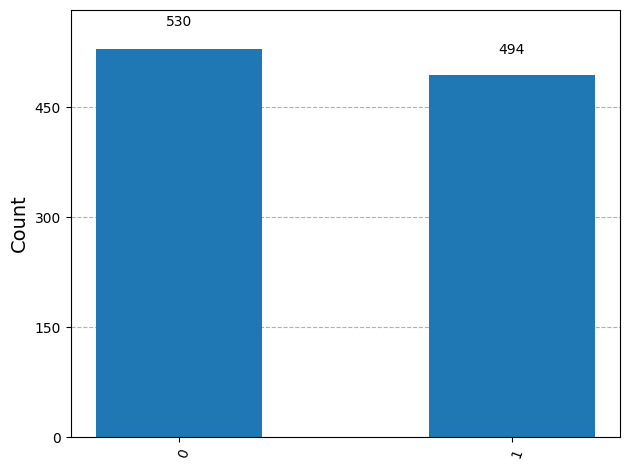

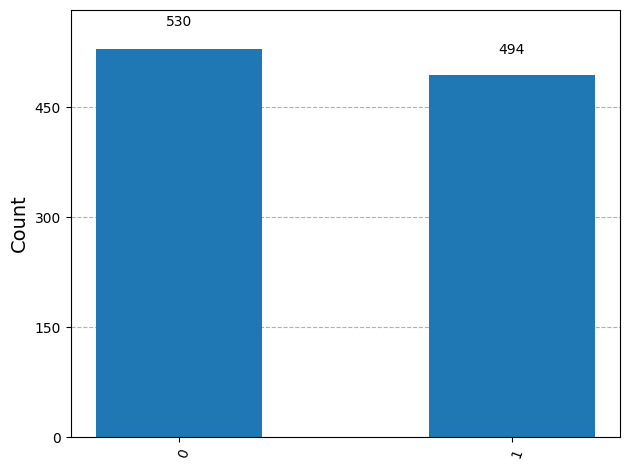

In [194]:
from qiskit.providers.basic_provider import BasicProvider
simulator = BasicProvider().get_backend('basic_simulator')
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()
plot_histogram(result.get_counts())

In [195]:
from qiskit.qasm2 import dumps, dump # use dumps for string, dump for file

qasm_str_v3 = dumps(circuit)
print(qasm_str_v3)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[1];
creg c[1];
h q[0];
measure q[0] -> c[0];
